<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> k-NN  </h1>
  <p></p>
</div>

In [75]:
# Inicializar el ambiente
import numpy as np
import pandas as pd
import math
import random
import time
import os
import sys
from scipy.spatial import distance
from sklearn import cluster
from matplotlib import pyplot as plt
%matplotlib inline
np.set_printoptions(precision=2, suppress=True) # Cortar la impresión de decimales a 1

In [76]:
k_means = None
neighbors = None
neighbors_dists = None 

In [77]:
def classify_point(k_neighs):
    global neighbors
    global neighbors_dists 
    LARGER_DISTANCE = sys.maxsize

    neighbors_dists = [LARGER_DISTANCE] * k_neighs
    neighbors = [0] * k_neighs

    for i in range(len(train_set)):
        dist = distance.euclidean(train_set.iloc[i].tolist(), test_point)
        
        for k in range(k_neighs):
            if (dist < neighbors_dists[k]) :
                for j in range(k_neighs-1, k, -1):
                    neighbors_dists[j] = neighbors_dists[j-1]
                    neighbors[j] = neighbors[j-1] 
                neighbors_dists[k] = dist
                neighbors[k] = i
                break

    print("Los {} vecinos más próximos son:".format(k_neighs))


    for k in range(k_neighs):
        clase = k_means.labels_[neighbors[k]]
        print("Vecino {}: {}, dist={}, clase={}, centroide={}"
              .format(k, neighbors[k], neighbors_dists[k], 
                      clase, k_means.cluster_centers_[clase]))


    print("\nEl nuevo punto es asignado a la clase", k_means.labels_[neighbors[0]])

In [78]:
#número de cluster a graficar
num_clusters = 3

In [79]:
def draw_graph(num_clusters):
    #código para gráfico
    global k_means
    k_means = cluster.KMeans(n_clusters=num_clusters, init='random')
    k_means.fit(train_set) 
    print("Prototipos de clase (centroides):\n", k_means.cluster_centers_)

    fig = plt.figure(figsize=(8, 5))
    colors = ['#ff0000', '#00ff00', '#0000ff']


    for k in range(num_clusters):
        my_members = k_means.labels_ == k
        plt.plot(train_set[my_members][0], train_set[my_members][1], 'o', 
                 markeredgecolor='k', markerfacecolor=colors[k], markersize=4)
        plt.plot(k_means.cluster_centers_[k][0], k_means.cluster_centers_[k][1], 'o', 
                 markeredgecolor='k', markerfacecolor=colors[k], markersize=6)


        plt.annotate(str(test_point), xy=(test_point[0], test_point[1]), xytext=(40, 50),
                arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=7))

    plt.plot(test_point[0], test_point[1], 'y', marker='*', markersize=15)

    plt.xlim([-10,110])
    plt.ylim([-10,100])
    plt.show()

# k Vecinos más cercanos




## Definición

Se entiende por **clasificación** el proceso de identificar a qué conjunto de categorías o *clases* pertenece una nueva observación, <u>usualmente</u> sobre la base de un conjunto de elementos cuya pertenencia a una categoría ya es conocida.

![ ](images/classification_sorting.png)

El *clustering* se socia con el *aprendizaje no supervisado* y la *clasificación* con el *aprendizaje supervisado*.

Entre los métodos más populares de clasificación se encuentran los siguientes:

* El método de $k$-vecinos próximos

* El clasificador ingenuo de Bayes

* Los árboles de decisión

* Las máquinas de soporte vectorial

* Las redes neuronales



## Técnicas de clasificación: El método de $k$-vecinos más cercanos


El método de **$k$-vecinos más cercanos** (o simplemente k-NN) es un método de *aprendizaje basado en instancias y basado en distancias* (*lazy learning*). Esto significa que el aprendizaje no conduce a una generalización: no existe una fase de entrenamiento (o es muy breve) y en su lugar el método mantiene todos los datos disponibles y los emplea para realizar la clasificación. 

En el  aprendizaje basado en instancias, se almacenan los ejemplos de entrenamiento y cuando se quiere clasificar un nuevo objeto, se extraen los objetos más parecidos de entre todas las muestras y se usa su clasificación para clasificar al nuevo objeto.

Para poder unir variables o individuos es necesario tener algunas medidas numéricas que caractericen las relaciones entre las variables o los individuos. Cada medida refleja asociación en un sentido particular y es necesario elegir una medida apropiada para el problema concreto que se esté tratando. La medida de asociación puede ser una
distancia o una similaridad. k-NN  es basado en distancias por que la relevancia de los datos se mide en función de una medida de distancia o similariadad.


#### Funciones de Distancia
-  Euclidea
-  Euclidea normalizada
-  Manhattan
-  Chebyshev
-  Minmowiski
-  Mahalanobis


#### Medidas de similaridad

- Coeficiente de correlación de Pearson
- Coeficiente de correlación por rangos de Kendall
- Coeficiente de correlaciónSpearman


Cuando se elige una distancia como medida de asociación (por ejemplo la distancia euclídea) los grupos formados contendrán individuos parecidos de forma que la distancia entre ellos ha de ser pequeña.

Cuando se elige una medida de similaridad (por ejemplo el coeficiente de correlación) los grupos formados contendrán individuos con una similaridad alta entre ellos.


k-NN es un método de aprendizaje *no paramétrico*, es decir, no asume una distribución específica de los datos; en particular, no requiere distribuciones *bien comportadas* (que sigan una distribución normal o que sean separables linealmente, por ejemplo).

k-NN puede emplearse para clasificación o para regresión. Este último caso se analizará en una lección posterior.




### Algoritmo

El algoritmo k-NN es muy intuitivo: Asumimos que tenemos un conjunto de vectores previamente clasificados y que debemos clasificar un nuevo vector. 

![ ](images/knn1.png)

El proceso consiste en buscar los $k$ vectores ya clasificados que sean más cercanos al nuevo vector; la clase del nuevo vector se determina mediante un proceso de votación: el vector es asignado a aquella clase que tenga más representantes dentro de los $k$ vecinos.


<img src="images/knn_.png" alt="Drawing" style="width:600px;"/>

In [80]:
# Leer los datos de archivo, separar training y test y calcular "prototipos de clase"
train_set = pd.DataFrame(pd.read_csv("Data/datosProm.csv", names = ['A', 'B']).values)

nnom= train_set.columns[1]
print(nnom)

1


definimos el punto de prueba, es decir el punto nuevo a clasificar 

In [81]:
#promonemos un punto en el plano
test_point = [100, 60]

Prototipos de clase (centroides):
 [[ 0.   73.89]
 [82.26 78.2 ]
 [80.16 15.64]]


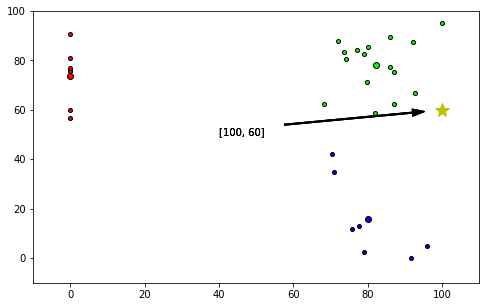

In [82]:
# numero de clusters(número de clases)
num_cluster = 3
draw_graph(num_cluster)

### Casos según $k$

Existen dos casos generales de implementación del método kNN:
#### <big>**Regla del vecino más cercano (k = 1)**. </big>

El escenario es muy simple: Buscar el vector de *entrenamiento* $x$ cuya similaridad al vector de entrada $y$ sea mayor (o cuya distancia a $y$ sea menor): 

In [83]:
print(test_point)
k_neighs = 1
classify_point(k_neighs)

[100, 60]
Los 1 vecinos más próximos son:
Vecino 0: 29, dist=10.100773485233697, clase=1, centroide=[82.26 78.2 ]

El nuevo punto es asignado a la clase 1


Este enfoque da buenos resultados si :

1) Las clases están muy bien diferenciadas

2) El número de ejemplos sea muy grande. En tal caso, es muy probable que para cada nuevo observación haya un elemento en el conjunto de entrenamiento que sea casi idéntico a la nueva obervación.

3) Que el vecino más próximo se tome con respecto a los prototipos!... 

#### <big>**Regla de los k-vecinos más cercanos**. </big>

En este caso, se seleccionan los $k$ vectores de entrenamiento más cercanos a la nueva observación. La nueva clase es seleccionada mediante un proceso de *votación*. Existen diversas formas de realizar la votación, ya sea un simple conteo de vecinos en cada caso o diversas formas de votación ponderada.

In [84]:
k_neighs = 100

In [85]:
classify_point(k_neighs)

Los 100 vecinos más próximos son:
Vecino 0: 29, dist=10.100773485233697, clase=1, centroide=[82.26 78.2 ]
Vecino 1: 21, dist=13.248891878191174, clase=1, centroide=[82.26 78.2 ]
Vecino 2: 4, dist=18.03995565404749, clase=1, centroide=[82.26 78.2 ]
Vecino 3: 13, dist=20.082153295899328, clase=1, centroide=[82.26 78.2 ]
Vecino 4: 5, dist=22.22791544432361, clase=1, centroide=[82.26 78.2 ]
Vecino 5: 12, dist=23.09718597578502, clase=1, centroide=[82.26 78.2 ]
Vecino 6: 26, dist=28.70050468197379, clase=1, centroide=[82.26 78.2 ]
Vecino 7: 22, dist=30.74673582675078, clase=1, centroide=[82.26 78.2 ]
Vecino 8: 7, dist=31.893472686429114, clase=1, centroide=[82.26 78.2 ]
Vecino 9: 6, dist=32.407560846197605, clase=1, centroide=[82.26 78.2 ]
Vecino 10: 17, dist=32.728487423038665, clase=1, centroide=[82.26 78.2 ]
Vecino 11: 9, dist=33.174158858967324, clase=1, centroide=[82.26 78.2 ]
Vecino 12: 27, dist=33.5132902741584, clase=1, centroide=[82.26 78.2 ]
Vecino 13: 0, dist=34.681320981185245, 

### Observaciones

* La elección del valor de $k$ es una decisión crítica en el método de $k$ vecinos próximos. Si se elige un valor muy pequeño, el resultado será muy vulnerable al ruido, si se toma un valor muy alto, además de hacer computacionalmente costoso el método se pierde el factor de cercanía. Una elección típica es tomar $k=\frac{1}{2}\sqrt{n}$, siendo $n$ el número de datos de entrenamiento.

* Se suele utilizar valores impares de $k$, especialmente cuando hay sólo 2 clases, para evitar empates.

<hr style="border-width: 3px;">

### Tarea

* Utilice el método de $k$ vecinos próximos para realizar la limpieza de datos en el Pima Indians Diabetes Dataset.

**Fecha de entrega**: 

### Código con sklearn

In [86]:
import sklearn
sklearn.__version__

'0.21.3'

<div class="alert alert-info" role="alert"><i class="fa fa-lightbulb-o" aria-hidden="true"></i> <strong> Más  sobre k-NN</strong> <p>http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html <p> http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html --> distancias</div>

### k = 1

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


In [109]:

k = 1


In [110]:
# import some data to play with
iris = datasets.load_iris()

In [113]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [112]:

iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
print(iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [91]:
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X_ = iris.iloc[:,0:2].as_matrix()
y_ = iris.target

C:\Users\SantaCruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
clf = neighbors.KNeighborsClassifier(k, metric = 'euclidean')
clf.fit(X_, y_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [115]:
#Si queremos predecir dos nuevos ejemplos, los almacenamos en un numpy array
x_nuevo = np.array([[1.02, 3.7], [4.87, .8]])

In [94]:
 iris.iloc[:,0:2].head(3)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


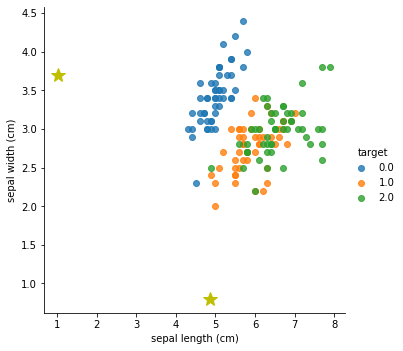

In [116]:
#cargar biblioteca de gráficos
import seaborn as sns
#graficar el dataset
sns.lmplot(x="sepal length (cm)", y="sepal width (cm)",  hue="target", data=iris, fit_reg=False,)

#graficar el primer punto
plt.plot(x_nuevo[0,0], x_nuevo[0,1], 'y', marker='*', markersize=15)
#graficar el segundo punto
plt.plot(x_nuevo[1,0], x_nuevo[1,1], 'y', marker='*', markersize=15)

In [117]:
Z = clf.predict(x_nuevo)
print("Clases asignadas: ",Z)

Clases asignadas:  [0. 1.]


### k  > 1 

In [130]:
k = 3

formalmente re defeniriamos el modelo

In [131]:

clf = neighbors.KNeighborsClassifier(k, metric = 'euclidean')
clf.fit(X_, y_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [119]:
x_nuevo = np.array([[5.5, 3.2], [6.1, 2.2]])

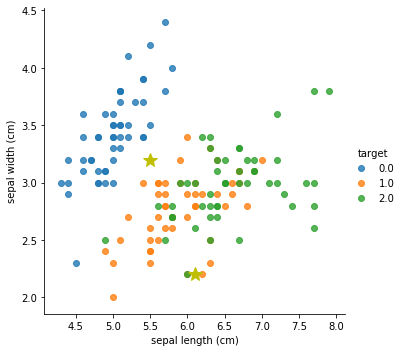

In [120]:
#graficar el dataset
sns.lmplot(x="sepal length (cm)", y="sepal width (cm)",  hue="target", data=iris, fit_reg=False,)

#graficar el primer punto
plt.plot(x_nuevo[0,0], x_nuevo[0,1], 'y', marker='*', markersize=15)
#graficar el segundo punto
plt.plot(x_nuevo[1,0], x_nuevo[1,1], 'y', marker='*', markersize=15)

In [121]:
Z = clf.predict(x_nuevo)
print("Clases asignadas: ",Z)

Clases asignadas:  [0. 1.]


In [122]:
clf.kneighbors(x_nuevo,5 , return_distance=False)

array([[ 31,  20,  84,  66,  88],
       [119,  62,  68,  87,  72]], dtype=int64)

In [123]:
clf.kneighbors([[5.5, 3.2]],7 , return_distance=True)

(array([[0.22, 0.22, 0.22, 0.22, 0.22, 0.28, 0.3 ]]),
 array([[31, 20, 66, 84, 88, 95, 36]], dtype=int64))

In [127]:
iris.iloc[84,:]

sepal length (cm)    5.4
sepal width (cm)     3.0
petal length (cm)    4.5
petal width (cm)     1.5
target               1.0
Name: 84, dtype: float64

In [132]:
clf.predict_proba(x_nuevo)

array([[0.67, 0.33, 0.  ],
       [0.  , 0.67, 0.33]])

## Test  y Train 

### k mayor a uno

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import neighbors
#from sklearn.model_selection import cross_validate
#import sklearn.model_selection.cross_validate
#import sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
import sklearn.datasets 
# load sample dataset of digits
digits = datasets.load_digits()


# prepare datasets from training and for validation
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)





# runs the kNN classifier for even number of neighbors from 1 to 10
for n in range(1, 29, 2):
        
        #clf = neighbors.KNeighborsClassifier(1)
        clf = neighbors.KNeighborsClassifier(n_neighbors=n, p=2, metric='minkowski')
        # instance based learning
        clf.fit(X_train, y_train)

        # predict
        y_pred = clf.predict(X_test)

        # learning metrics
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)

        print ("Neighbors: %d" % n)
        print ("Confusion Matrix")
        print (cm)

        print ("Accuracy score: %f" % accuracy_score(y_test, y_pred))
        print("---------------------------------------------------------------------<>")


Neighbors: 1
Confusion Matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0]
 [ 0  0 71  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  0  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  0  0  0  0 87  1  0  0  1]
 [ 0  0  0  0  0  0 76  0  0  0]
 [ 0  0  0  0  0  0  0 65  0  0]
 [ 0  2  0  1  0  0  0  0 74  1]
 [ 0  0  0  2  0  1  0  0  0 71]]
Accuracy score: 0.987483
---------------------------------------------------------------------<>
Neighbors: 3
Confusion Matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0]
 [ 0  0 71  0  0  0  0  0  0  0]
 [ 0  0  1 69  0  0  0  0  0  0]
 [ 0  0  0  0 62  0  0  1  0  0]
 [ 0  1  0  0  0 86  1  0  0  1]
 [ 0  0  0  0  0  0 76  0  0  0]
 [ 0  0  0  0  0  0  0 65  0  0]
 [ 0  2  0  2  0  0  0  0 73  1]
 [ 0  0  0  1  0  0  0  0  0 73]]
Accuracy score: 0.984701
---------------------------------------------------------------------<>
Neighbors: 5
Confusion Matrix
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  

## Validacioón cruzada 